In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
from sklearn.linear_model import LinearRegression

In [2]:
# Blood Pressure data
x = [22, 41, 52, 23, 41, 54, 24, 46, 56, 27, 47, 57, 28, 48, 58,  9,
     49, 59, 30, 49, 63, 32, 50, 67, 33, 51, 71, 35, 51, 77, 40, 51, 81]
y = [131, 139, 128, 128, 171, 105, 116, 137, 145, 106, 111, 141, 114,
     115, 153, 123, 133, 157, 117, 128, 155, 122, 183,
     176,  99, 130, 172, 121, 133, 178, 147, 144, 217]
x = np.asarray(x, np.float32)
y = np.asarray(y, np.float32)

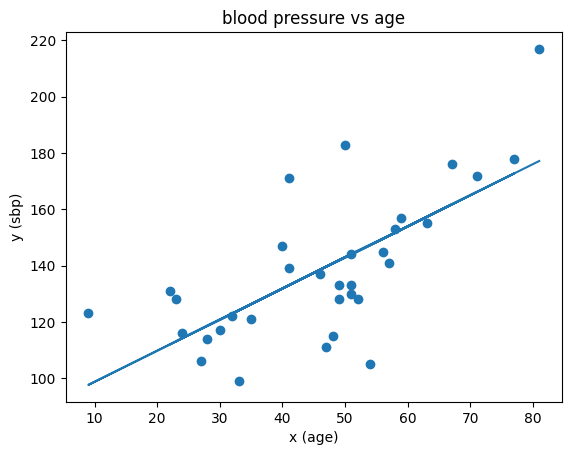

intercept =  87.67143 solpe =  1.1050216


In [3]:
plt.scatter(x=x, y=y)
plt.title("blood pressure vs age")
plt.xlabel("x (age)")
plt.ylabel("y (sbp)")

model = LinearRegression()
res = model.fit(x.reshape((len(x),1)), y) # Fitting the linear regression
predictions = model.predict(x.reshape((len(x),1)))
plt.plot(x, predictions)
plt.show()
print("intercept = ",res.intercept_,"solpe = ", res.coef_[0])


In [4]:
x_sub = x[0:5] #extract the first 5 data points of x
y_sub = y[0:5] #extract the first 5 data points of y
a = 1
b = 100
y_hat = a*x_sub + b
r = (y_sub - y_hat)
MSE = np.sum(np.square(r)) / len(y_sub)
MSE

317.2

In [5]:
a = 1
b = 100
y_hat = a*x + b
r = (y - y_hat)
MSE = np.sum(np.square(r)) / len(y)
MSE

408.1515151515151

In [6]:
a = 0.67                            # try a diffrent value for a here that minimizes the MSE
b = 108                            # try a diffrent value for b here that minimizes the MSE
# diff 399.50 to 349.20090553977275
y_hat = a*x + b
r = (y - y_hat)
MSE = np.sum(np.square(r)) / len(y)
MSE

399.503876657197

In [7]:
a_hat = np.sum((x-np.mean(x))*((y-np.mean(y)))) / (np.sum(np.square(x-np.mean(x))))
b_hat = np.mean(y) - a_hat*np.mean(x)

a = a_hat
b = b_hat
y_hat = a*x + b
r = (y - y_hat)
MSE = np.sum(r**2) / len(y)

print("slope : a_hat = " ,a_hat)
print("intercept : b_hat = " ,b_hat)
print("minimal MSE = ", MSE)

slope : a_hat =  1.1050217
intercept : b_hat =  87.67143
minimal MSE =  349.20090553977275


In [8]:
b = 87.6
a = np.arange(-1, 2, 0.02)
MSE=np.zeros(len(a))
for i in range(0,len(a)):
  MSE[i] =  np.mean(np.square(y-(a[i] * x + b)))

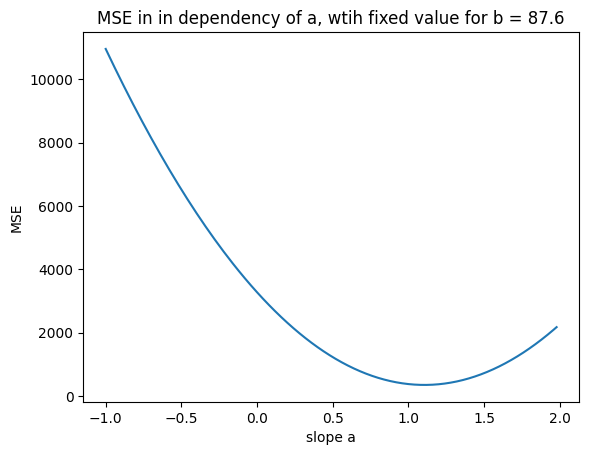

In [9]:
plt.plot(a,MSE)
plt.title("MSE in in dependency of a, wtih fixed value for b = 87.6")
plt.xlabel("slope a")
plt.ylabel("MSE")
plt.show()

In [10]:
a_ = -0.5
a_history = -0.5
eta = 0.0003
for i in range(0,5):
  grad_a = -2/len(y)*np.sum((y -a_ * x - b) *x)
  a_ = a_ - eta*grad_a
  a_history =np.append(a_history,a_)
print(a_history)

[-0.5         1.80608736  0.80163942  1.23914048  1.04858093  1.1315818 ]


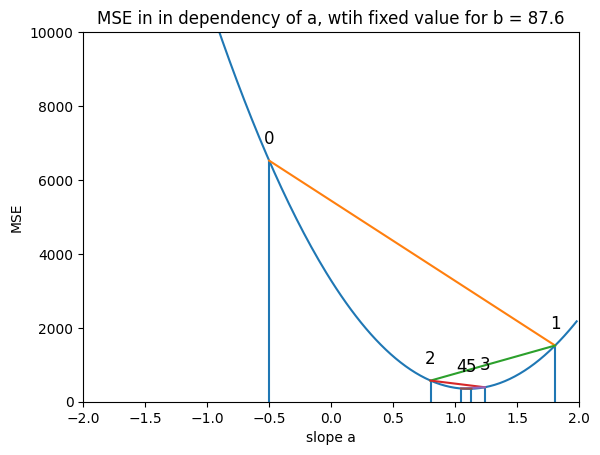

In [11]:
# Visualization of the learning process
plt.plot(a,MSE)
plt.title("MSE in in dependency of a, wtih fixed value for b = 87.6")
plt.xlabel("slope a")
plt.ylabel("MSE")
plt.ylim((0,10000))
plt.xlim((-2,2))

for i in range(0,len(a_history)):
  plt.vlines(x=a_history[i],ymin=0,ymax= np.mean(np.square(y-(a_history[i] * x + b))))
  plt.text(x=a_history[i],y= np.mean(np.square(y-(a_history[i] * x + b)))+600,s= i,horizontalalignment='center',verticalalignment='center',fontsize=12)
for i in range(0,len(a_history)-1):
  plt.plot([a_history[i], a_history[i+1]],[np.mean(np.square(y-(a_history[i] * x + b))), np.mean(np.square(y-(a_history[i+1] * x + b)))])
plt.show()